In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Load a dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

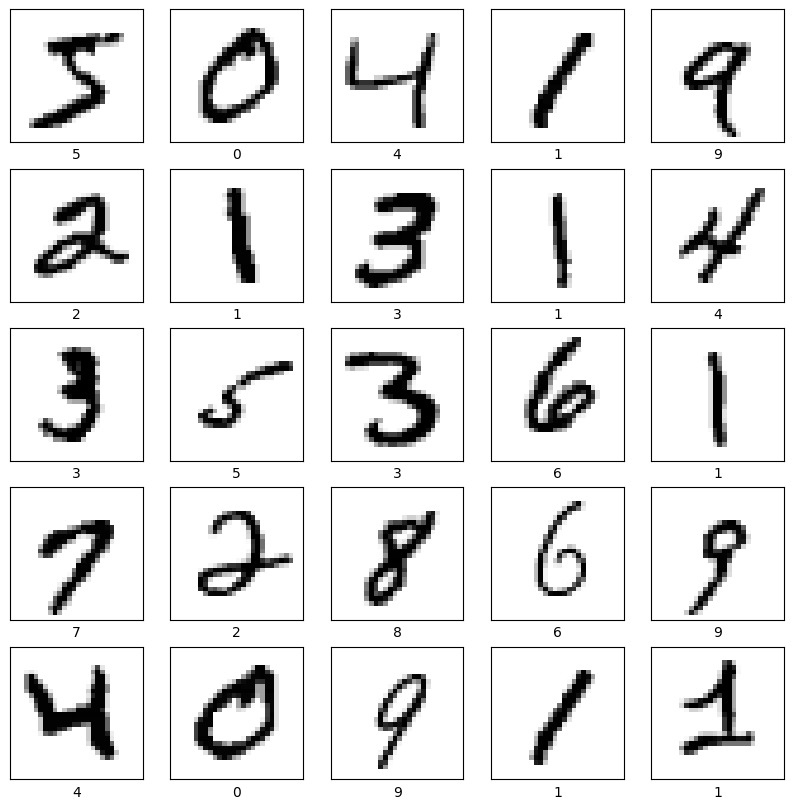

In [44]:
# Define class names for the labels
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# Function to display images and labels
def display_images_labels(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Display images and labels for training dataset
display_images_labels(x_train, y_train, class_names)

In [45]:
# Building a Keras sequential model
model = tf.keras.models.Sequential([
	tf.keras.layers.Flatten(input_shape=(28, 28)),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dropout(0.2),       # prevent overfitting
	tf.keras.layers.Dense(10)
])

In [46]:
predictions = model(x_train[:1]).numpy()

In [47]:
# Probability for each class
tf.nn.softmax(predictions).numpy()

# Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the model
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3002 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1434 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1076 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0884 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0748 - accuracy: 0.9768


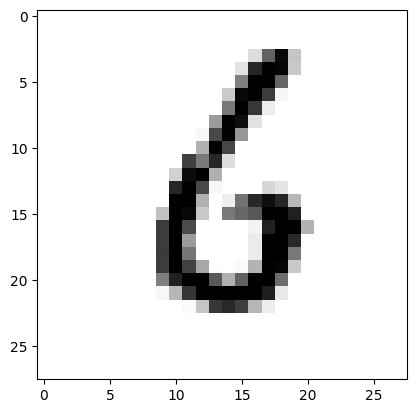

In [48]:
test_image = x_test[50]
plt.imshow(test_image, cmap=plt.cm.binary)

In [49]:
test_image = np.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)

1/1 [==============================] - 0s 66ms/step


In [50]:
# Convert predictions to probabilities using softmax
probabilities = tf.nn.softmax(predictions).numpy()

# Get the predicted class label
predicted_label = np.argmax(predictions)
print(predicted_label)

6
